In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 学習データを読み込む
train = np.loadtxt('images2.csv', delimiter=',', skiprows=1)
train_x = train[:,0:2]
train_y = train[:,2]

In [3]:
# パラメータを初期化
theta = np.random.rand(3)

In [4]:
# 標準化
mu = train_x.mean(axis=0)
sigma = train_x.std(axis=0)

In [10]:
def standardize(x):
    return (x - mu) / sigma

In [11]:
train_z = standardize(train_x)

In [12]:
# x0を加える
def to_matrix(x):
    x0 = np.ones([x.shape[0], 1])
    return np.hstack([x0, x])

In [16]:
X = to_matrix(train_z)

In [17]:
# シグモイド関数
def f(x):
    return 1 / (1 + np.exp(-np.dot(x, theta)))

In [24]:
# 学習率
ETA = 1e-3

# 繰り返し回数
epoch = 5000

# 更新回数
count = 0

# 学習を繰り返す
for _ in range(epoch):
    theta = theta - ETA * np.dot(f(X) - train_y, X)

    # ログの出力
    count += 1
    if count % 500 == 0:
        print('{}回目: theta = {}'.format(count, theta))

500回目: theta = [-0.32332592  4.6946555  -3.52443172]
1000回目: theta = [-0.34336629  4.84771969 -3.65997601]
1500回目: theta = [-0.36150895  4.99114536 -3.7868911 ]
2000回目: theta = [-0.3780702   5.12614656 -3.90625659]
2500回目: theta = [-0.3932974   5.25371387 -4.01895445]
3000回目: theta = [-0.40738683  5.37466717 -4.12571576]
3500回目: theta = [-0.42049629  5.48969354 -4.2271541 ]
4000回目: theta = [-0.43275415  5.599375   -4.32379008]
4500回目: theta = [-0.444266    5.70420932 -4.41606963]
5000回目: theta = [-0.45511952  5.80462583 -4.50437794]


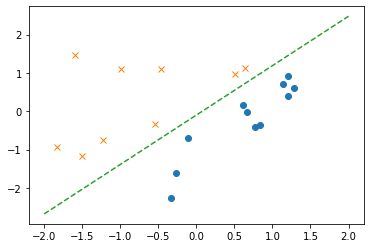

In [25]:
# プロットして確認
x0 = np.linspace(-2, 2, 100)
plt.plot(train_z[train_y == 1, 0], train_z[train_y == 1, 1], 'o')
plt.plot(train_z[train_y == 0, 0], train_z[train_y == 0, 1], 'x')
plt.plot(x0, -(theta[0] + theta[1] * x0) / theta[2], linestyle='dashed')
plt.show()

In [20]:
# 分類関数
def classify(x):
    return (f(x) >= 0.5).astype(np.int)

In [21]:
standardize([[200,100],[100,200]])

array([[-0.68030239, -1.70890726],
       [-1.34271952, -0.86102472]])

In [32]:
f(to_matrix(standardize([[701,200],[120,100]]))) #横長である確率

array([0.99999999, 0.55415596])